In [5]:
import confirm.outlaw.nb_util as nb_util

nb_util.setup_nb()
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
plot_dims = [2, 3]
unplot_dims = list(set(range(4)) - set(plot_dims))

In [9]:
with open("../adagrid/4d_full/plot_all.pkl", "rb") as f:
    (slc, typeI_err, lamstar, nearby_count) = pickle.load(f)

In [ ]:
overall_lam = 0.0625298
worst_tile = np.array([0.53271484, 0.53271484, 0.53271484, -0.99951172])

In [17]:
8.5 / 5.5 * 6.5

10.045454545454545

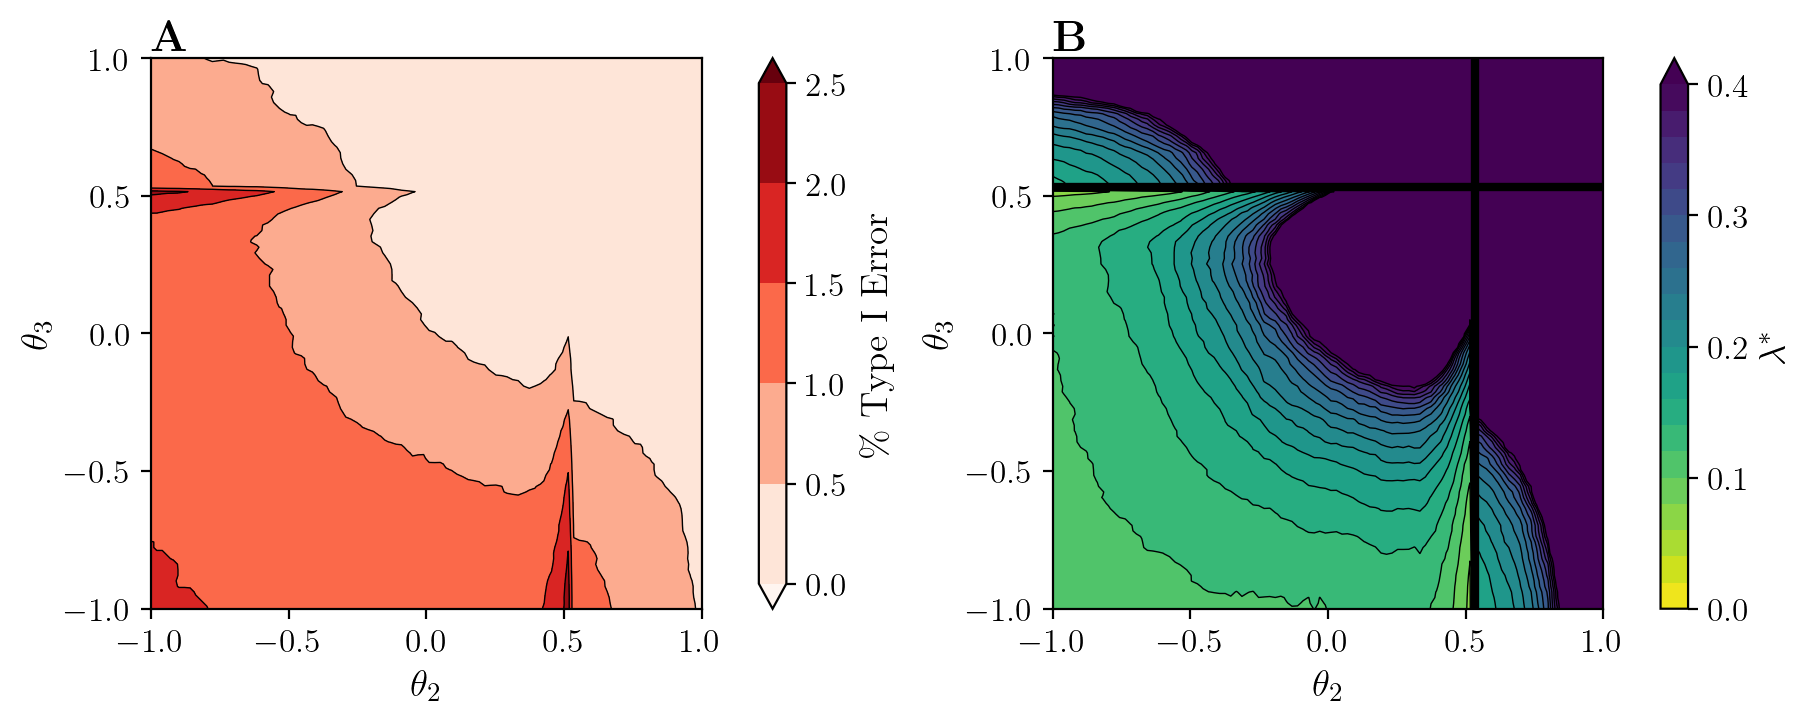

In [27]:
x = slc[..., plot_dims[0]]
y = slc[..., plot_dims[1]]
z = typeI_err.reshape(slc.shape[:2])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3.5), constrained_layout=True)
# plt.suptitle(f"${up0_str} ~~~ {up1_str}$")
plt.subplot(1, 2, 1)
lam_str = ""
# plt.title(f"Type I error with $\lambda" + f" = {overall_lam:.4f}$")
levels = np.linspace(0, 2.5, 6)
cbar_target = plt.contourf(x, y, z * 100, levels=levels, cmap="Reds", extend="both")
plt.contour(
    x,
    y,
    z * 100,
    levels=levels,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    extend="both",
)
cbar = plt.colorbar(cbar_target)
cbar.set_label("\% Type I Error")
# plt.axvline(x=0, color="k", linestyle="-", linewidth=4)
# plt.axhline(y=0, color="k", linestyle="-", linewidth=4)
plt.xlabel(f"$\\theta_{plot_dims[0]}$")
plt.xticks(np.linspace(-1, 1, 5))
plt.ylabel(f"$\\theta_{plot_dims[1]}$")
plt.yticks(np.linspace(-1, 1, 5))
plt.axis("square")
plt.text(-1.0, 1.03, "$\mathbf{A}$", fontsize=16)

plt.subplot(1, 2, 2)
x = slc[..., plot_dims[0]]
y = slc[..., plot_dims[1]]
z = lamstar[:, 0].reshape(slc.shape[:2])
up0_str = f"\\theta_{unplot_dims[0]} = {slc[0,0,unplot_dims[0]]:.3f}"
up1_str = f"\\theta_{unplot_dims[1]} = {slc[0,0,unplot_dims[1]]:.3f}"
# plt.title(f"$\lambda^*$")
levels = np.linspace(0, 0.4, 21)
cbar_target = plt.contourf(x, y, z, levels=levels, cmap="viridis_r", extend="max")
plt.contour(
    x,
    y,
    z,
    levels=levels,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    extend="max",
)
cbar = plt.colorbar(cbar_target, ticks=np.linspace(0, 0.4, 5))
cbar.set_label("$\lambda^*$")
plt.axvline(x=slc[0, 0, unplot_dims[0]], color="k", linestyle="-", linewidth=3)
plt.axhline(y=slc[0, 0, unplot_dims[0]], color="k", linestyle="-", linewidth=3)
plt.xlabel(f"$\\theta_{plot_dims[0]}$")
plt.xticks(np.linspace(-1, 1, 5))
plt.ylabel(f"$\\theta_{plot_dims[1]}$")
plt.yticks(np.linspace(-1, 1, 5))
plt.text(-1.0, 1.03, "$\mathbf{B}$", fontsize=16)
plt.axis("square")
plt.savefig("lewis_tie_lam.pdf", bbox_inches="tight")
plt.show()

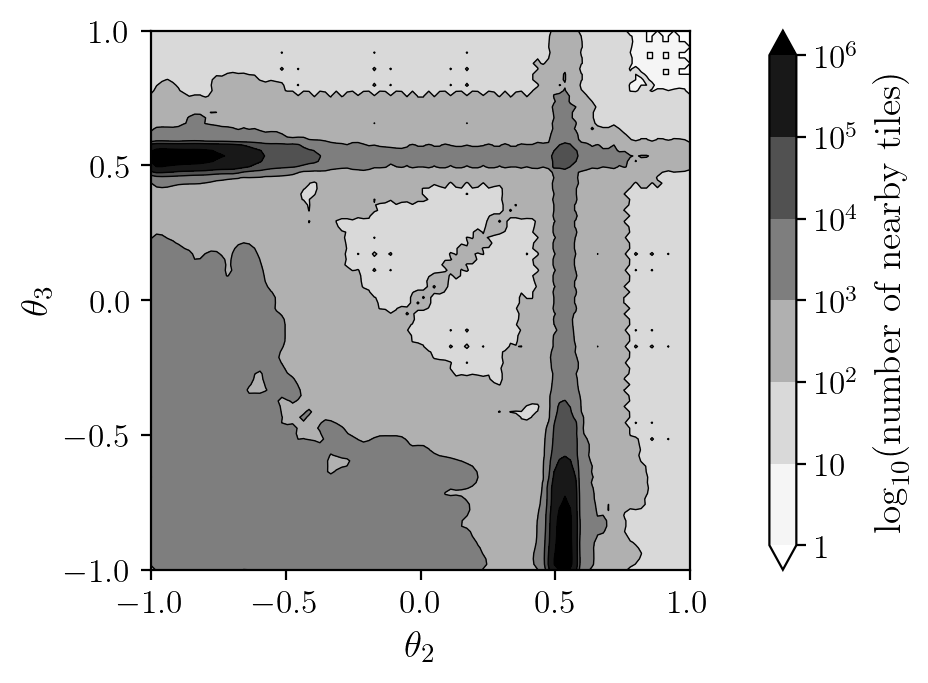

In [29]:
plt.figure(figsize=(5, 3.5))
x = slc[..., plot_dims[0]]
y = slc[..., plot_dims[1]]
z = np.array(nearby_count).reshape(slc.shape[:2])
z[z == 0] = 1
z = np.tril(z)
z = z + z.T - np.diag(np.diag(z))
z = np.log10(z)
levels = np.linspace(0, 6, 7)
# plt.title("$\log_{10}$(number of nearby tiles)")
cntf = plt.contourf(x, y, z, levels=levels, cmap="Greys", extend="both")
plt.contour(
    x,
    y,
    z,
    levels=levels,
    colors="k",
    linestyles="-",
    linewidths=0.5,
    extend="both",
)
cbar = plt.colorbar(cntf, ticks=np.arange(7))
cbar.ax.set_yticklabels(["1", "10", "$10^2$", "$10^3$", "$10^4$", "$10^5$", "$10^6$"])
cbar.set_label("$\log_{10}$(number of nearby tiles)")
plt.xlabel(f"$\\theta_{plot_dims[0]}$")
plt.xticks(np.linspace(-1, 1, 5))
plt.ylabel(f"$\\theta_{plot_dims[1]}$")
plt.yticks(np.linspace(-1, 1, 5))
# plt.text(-1.0, 1.03, "$\mathbf{C}$", fontsize=16)
plt.axis("square")
plt.savefig("lewis_nearby.pdf", bbox_inches="tight")
plt.show()